In [4]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/625.1 kB 682.7 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/625.1 kB 919.0 kB/s eta 0:00:01
   --------------------------- ------------ 430.1/625.1 kB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 10.9 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 5.0 MB/s eta 0:00:01
   ------------- -------------------------- 0.9/2.8 MB 7.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.3/2.8 MB 7.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.5/2.8 MB 6.7 MB/s eta 0:00:01
   -------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


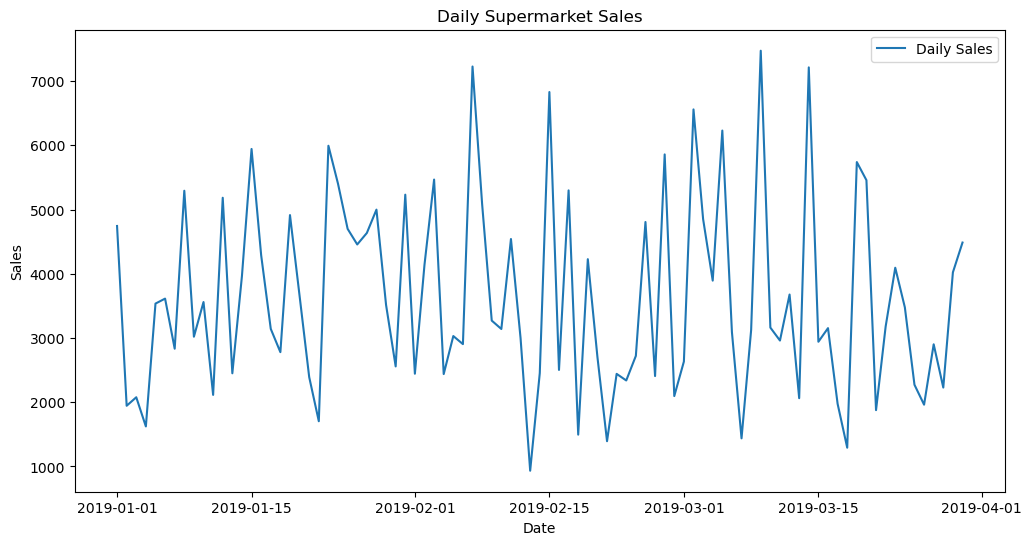

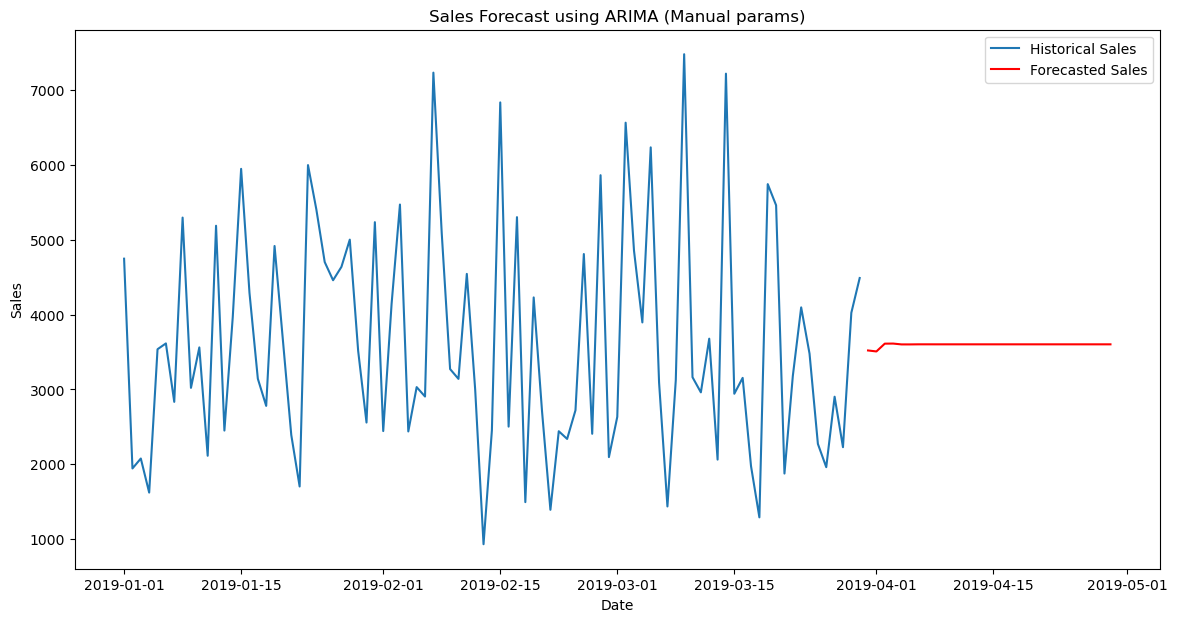

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = r"C:\Users\leela\OneDrive\Desktop\supermarket_sales - Sheet1.csv"
df = pd.read_csv(file_path)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Aggregate 'Total' sales by day
daily_sales = df['Total'].resample('D').sum()

# Plot the original data
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Daily Sales')
plt.title('Daily Supermarket Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# 1. Set ARIMA parameters manually
p, d, q = 2, 1, 2  # You can adjust these

# 2. Fit ARIMA model
model = ARIMA(daily_sales, order=(p, d, q))
model_fit = model.fit()

# 3. Forecast future sales
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# 4. Plot Forecast
plt.figure(figsize=(14, 7))
plt.plot(daily_sales, label='Historical Sales')
plt.plot(pd.date_range(daily_sales.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D'), forecast, color='red', label='Forecasted Sales')
plt.title('Sales Forecast using ARIMA (Manual params)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
